# Model training

In [166]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from  sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#df_final = pd.read_csv("preprocessed_data/RestWaterRodent_data.csv")
df_try = pd.read_csv("preprocessed_data/data_for_model.csv")
df_try.head()

,Unnamed: 0,CAMIS,ZIPCODE,CUISINE DESCRIPTION,GRADE,ClosestWorkingTankDis,ClosestBadTankDis,BORO_Bronx,BORO_Brooklyn,BORO_Manhattan,...,BORO_Staten Island,RESULT,Pop,White,Black,Hispanic,Native,Asian,Inc,Unemp
0,0,30112340,2.801389,2.913240,3.0,0.226460,4.392523,0.0,1.0,0.0,...,0.0,0.0,2501.0,12.2,63.2,18.4,2.4,1.6,35028.0,11.5
1,1,30112340,2.801389,2.913240,2.0,0.226460,4.392523,0.0,1.0,0.0,...,0.0,0.0,2501.0,12.2,63.2,18.4,2.4,1.6,35028.0,11.5
2,2,30191841,2.831125,2.814634,3.0,0.004614,1.120030,0.0,0.0,1.0,...,0.0,0.0,5195.0,72.9,3.6,8.4,0.0,12.3,141678.0,4.7
3,3,30191841,2.831125,2.814634,3.0,0.004614,1.120030,0.0,0.0,1.0,...,0.0,0.0,5195.0,72.9,3.6,8.4,0.0,12.3,141678.0,4.7
4,4,40356018,2.868895,2.834724,3.0,0.315359,9.367778,0.0,1.0,0.0,...,0.0,0.0,2185.0,38.0,2.2,40.8,0.0,19.1,20040.0,12.2


In [167]:
# Keep columns not for training as metadata
#print(df_final.shape)
#meta_final = df_final[['CAMIS', 'GRADE DATE', 'VIOLATION CODE','ClosestWorkingTankDate', 'ClosestBadTankDate', 'PREV_GRADE DATE', 'INSPECTION_DATE']]
# data for model training
# data = df_final.drop(columns=['CAMIS', 'GRADE DATE', 'VIOLATION CODE','ClosestWorkingTankDate', 'ClosestBadTankDate', 'PREV_GRADE DATE', 'INSPECTION_DATE'])
data = df_try.drop(columns=['CAMIS'])

# New Section

In [168]:
#We can see here that the classes are grade 1 and grade 2
# data['GRADE'] = data['GRADE'].map({3.0: 2, 2.0 : 1,1.0:1})
data['GRADE'] = data['GRADE'].map({3.0: 0, 2.0 : 1,1.0:1})
pd.unique(data['GRADE'])
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
y=data['GRADE']
#X=data.drop(['Unnamed: 0','BBL','CRITICAL FLAG_Not Critical','GRADE','RECENCY'],axis=1)
#data[['Asian','Black','Pop','Black','Inc','Unemp']]=ss.fit_transform(data[['Asian','Black','Pop','Black','Inc','Unemp']])
X=data.drop(['Unnamed: 0','GRADE'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X, y, test_size=0.2) 

In [169]:
##data = pd.concat([data.drop('PREV_GRADE', axis=1), pd.get_dummies(data['PREV_GRADE'])], axis=1)

In [170]:
#data.drop(['RECENCY',0.0,1.0,2.0,3.0], axis=0)

In [171]:
#StandardScaler
X_train[['Asian','Black','Pop','Black','Inc','Unemp']]=ss.fit_transform(X_train[['Asian','Black','Pop','Black','Inc','Unemp']])
X_test[['Asian','Black','Pop','Black','Inc','Unemp']]=ss.transform(X_test[['Asian','Black','Pop','Black','Inc','Unemp']])

In [172]:
#Smote on train
sm=SMOTE()
X_train,y_train=sm.fit_resample(X_train,y_train)

In [173]:
# train_test_split
import tensorflow.keras
from keras.utils import np_utils
y_train=np.asarray(y_train)
y_train_new=np_utils.to_categorical(y_train)
y_train=y_train.astype('int')

In [220]:
# build model/
#We used two nodes (even though was possible with just 1 output node and sigmoid) so that we could adapt previous code
#Therefore we decided to use softmax as the output  function
import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense
model=keras.Sequential([
    Dense(325,input_shape=(18,),activation='relu'),
    Dense(144,activation= 'relu'),
    Dense(32,activation= 'relu'),
    Dense(2,activation='softmax')
])
# validation
model.compile('adam','categorical_crossentropy','accuracy')
X_train=np.asarray(X_train)
y_train_new=np.asarray(y_train_new)
# X_trainn, X_valn,y_trainn,y_valn= train_test_split(X_train, y_train_new, test_size=0.2,stratify=y_train_new)
X_trainn, X_valn,y_trainn,y_valn= train_test_split(X_train, y_train_new, test_size=0.2) 

In [221]:
# visualization
hist=model.fit(X_trainn,y_trainn,validation_data=(X_valn,y_valn),epochs=20,batch_size=64)

Epoch 1/20
800/800 [==============================] - 3s 4ms/step - loss: 0.6973 - accuracy: 0.5398 - val_loss: 0.6849 - val_accuracy: 0.5557
Epoch 2/20
800/800 [==============================] - 3s 3ms/step - loss: 0.6856 - accuracy: 0.5542 - val_loss: 0.6819 - val_accuracy: 0.5584
Epoch 3/20
800/800 [==============================] - 3s 3ms/step - loss: 0.6847 - accuracy: 0.5532 - val_loss: 0.6815 - val_accuracy: 0.5637
Epoch 4/20
800/800 [==============================] - 3s 3ms/step - loss: 0.6841 - accuracy: 0.5565 - val_loss: 0.6809 - val_accuracy: 0.5544
Epoch 5/20
800/800 [==============================] - 3s 3ms/step - loss: 0.6837 - accuracy: 0.5561 - val_loss: 0.6786 - val_accuracy: 0.5673
Epoch 6/20
800/800 [==============================] - 3s 3ms/step - loss: 0.6830 - accuracy: 0.5575 - val_loss: 0.6773 - val_accuracy: 0.5654
Epoch 7/20
800/800 [==============================] - 3s 4ms/step - loss: 0.6816 - accuracy: 0.5618 - val_loss: 0.6783 - val_accuracy: 0.5659
Epoch 

Text(0, 0.5, 'loss')

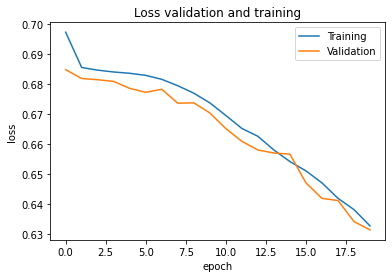

In [222]:
import pandas as pd
#No consistent sign of overfitting.
history=pd.DataFrame(hist.history)
fig,ax=plt.subplots()
plt.title('Loss validation and training')
line1=ax.plot(history.index, history['loss'],label='Training')
line2=ax.plot(history.index, history['val_loss'],label="Validation")
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

Text(0, 0.5, 'accuracy')

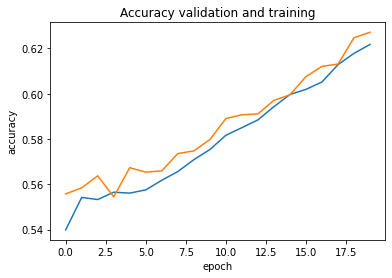

In [223]:
fig,ax=plt.subplots()
ax.plot(history.index, history['accuracy'],label='Training')
ax.plot(history.index,history['val_accuracy'],label='Validation')
plt.title('Accuracy validation and training')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')

In [224]:
#y_test=y_test-1
y_test

11102    0
13108    0
20353    0
39135    1
2680     1
        ..
25625    0
29748    0
28599    0
19705    0
20140    1
Name: GRADE, Length: 8958, dtype: int64

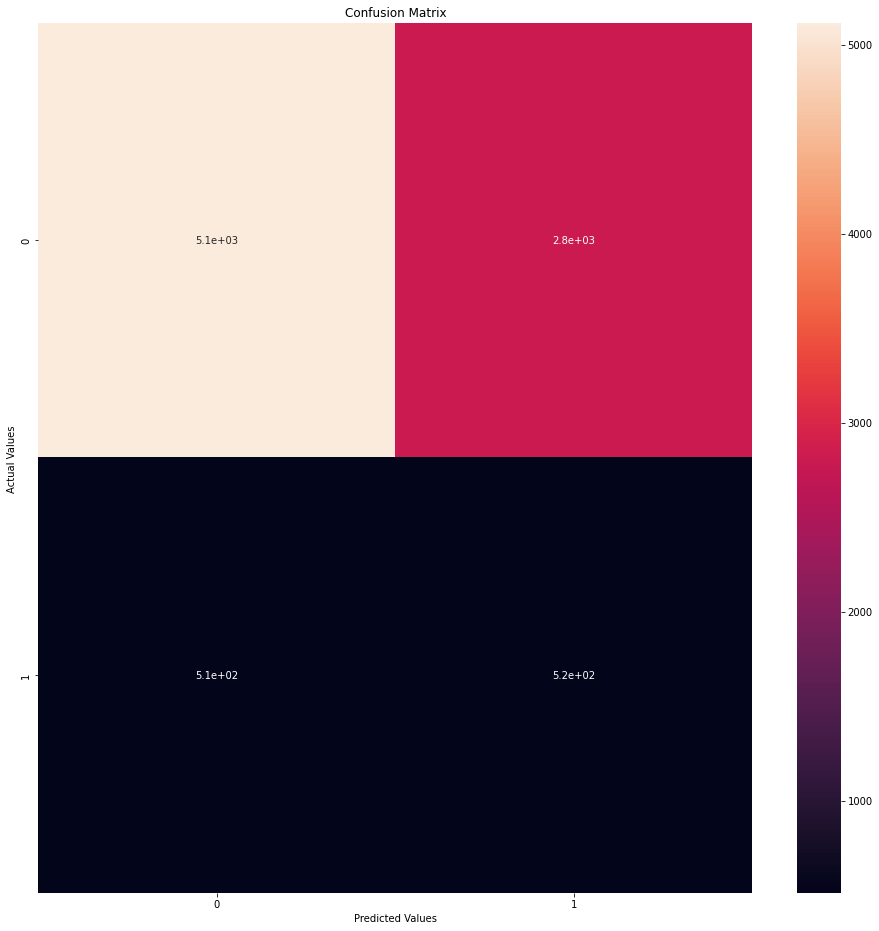

In [225]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
ypred=model.predict(X_test)
matrix=confusion_matrix(y_test,ypred.argmax(axis=1))
plt.figure(figsize=(16,16))
ax=sn.heatmap(matrix,annot=True)
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Unfortunately it is still very hard to predict the minority class!

In [226]:
accuracy=(matrix[0][0]+matrix[1][1])/np.sum(matrix)
print(accuracy)
ypred=ypred.argmax(axis=1)

0.6291582942621121


In [227]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred)
#Best achieved at 0.58

0.5746732860353619